In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

In [2]:
food_waste = pd.read_csv("01_음식물쓰레기_FOOD_WASTE_210811_update.CSV", encoding="cp949")
card_spending = pd.read_csv("04_음식관련 카드소비_CARD_SPENDING.CSV", encoding="cp949")

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cluster = pd.read_csv('클러스터링 최종.csv')

In [696]:
cluster.head()

,행정동코드,행정동명,관광인구,거주인구,cluster,spot
0,50110590,건입동,Z형,1,7,제주
1,50110256,구좌읍,V형,2,5,성산
2,50130253,남원읍,Z형,1,7,서귀포
3,50110660,노형동,A형,3,3,제주
4,50130590,대륜동,Z형,3,9,서귀포


# 카드데이터, 음식물 쓰레기 데이터 합치기

In [4]:
cs = card_spending.copy()
#다운샘플링
def get_year_month(x):
    return x[0:7]
cs['year_month'] = cs['base_date'].apply(lambda x: get_year_month(x))
cs= cs.drop(['base_date'], axis=1, inplace=False)

In [5]:
cs_1 = cs.groupby(['year_month','emd_nm','mct_cat_nm', 'mct_cat_cd']).sum().reset_index()
cs_1

,year_month,emd_nm,mct_cat_nm,mct_cat_cd,use_cnt,use_amt
0,2018-01,건입동,간식,C00400,4540,52714107
1,2018-01,건입동,농축수산물,C01200,1699,180535251
2,2018-01,건입동,마트/슈퍼마켓,A00200,17547,613458055
3,2018-01,건입동,배달,C01400,585,11571838
4,2018-01,건입동,부페,C00700,55,5081850
...,...,...,...,...,...,...
20000,2021-06,효돈동,아시아음식,C00300,720,25716378
20001,2021-06,효돈동,양식,C00200,225,9302910
20002,2021-06,효돈동,주점및주류판매,C00900,105,4039593
20003,2021-06,효돈동,패스트푸드,C00500,1205,20827922


In [6]:
fw = food_waste.copy()

def get_year_month(x):
    return x[0:7]
fw['year_month'] = fw['base_date'].apply(lambda x: get_year_month(x))

In [7]:
fw = fw.drop(['base_date'], axis=1, inplace=False)

In [8]:
fw_1 = fw.groupby(['year_month','emd_nm']).sum().reset_index()
fw_1

,year_month,emd_nm,em_cnt,em_g,pay_amt
0,2018-01,건입동,18416,45646550,1364804
1,2018-01,남원읍,9570,42437700,1270773
2,2018-01,노형동,113990,265018400,7883340
3,2018-01,대륜동,21666,57612600,1676850
4,2018-01,대정읍,10185,38885550,1164122
...,...,...,...,...,...
1661,2021-06,표선면,10751,42453750,1271419
1662,2021-06,한경면,8031,27060150,809898
1663,2021-06,한림읍,25653,82746990,2476292
1664,2021-06,화북동,66088,110750050,3306029


In [9]:
temp_1 = pd.merge(cs_1, fw_1, on=['year_month', 'emd_nm'])
temp_1
# 결측값 없이 두 데이터셋 merge

,year_month,emd_nm,mct_cat_nm,mct_cat_cd,use_cnt,use_amt,em_cnt,em_g,pay_amt
0,2018-01,건입동,간식,C00400,4540,52714107,18416,45646550,1364804
1,2018-01,건입동,농축수산물,C01200,1699,180535251,18416,45646550,1364804
2,2018-01,건입동,마트/슈퍼마켓,A00200,17547,613458055,18416,45646550,1364804
3,2018-01,건입동,배달,C01400,585,11571838,18416,45646550,1364804
4,2018-01,건입동,부페,C00700,55,5081850,18416,45646550,1364804
...,...,...,...,...,...,...,...,...,...
18078,2021-06,효돈동,아시아음식,C00300,720,25716378,8720,27554100,824457
18079,2021-06,효돈동,양식,C00200,225,9302910,8720,27554100,824457
18080,2021-06,효돈동,주점및주류판매,C00900,105,4039593,8720,27554100,824457
18081,2021-06,효돈동,패스트푸드,C00500,1205,20827922,8720,27554100,824457


# 무시

In [13]:
temp = temp_2[temp_2['mct_cat_nm']=='간식']
temp['em_g_d1']= temp['em_g'].diff()
temp['em_g_d1']= temp['em_g_d1'].shift(1)
temp['use_amt_d1']= temp['use_amt'].diff()
temp['use_amt_d1']= temp['use_amt_d1'].shift(1)
temp

NameError: ignored

In [ ]:
#행정동별, 카테고리별 소비총액의 lag(1)과 음식물쓰레기 배출량 상관관계
corr_data_1 = pd.DataFrame(index=range(0,len(set(temp_1['emd_nm']))),columns = ['emd_nm']+list(set(temp_1['mct_cat_nm'])))
n = 0
for i in tqdm(set(temp_1['emd_nm'])):
    print(i)
    temp_list = [np.nan]
    temp1 = temp_1[temp_1['emd_nm']==i]
    temp2 = temp_2[temp_1['emd_nm']==i]
    for j in set(temp_1['mct_cat_nm']):
        temp_22 = temp_1[temp_1['mct_cat_nm']==j]
        temp = temp2
        temp['em_g'] = temp['em_g'].shift(1)
        temp['em_g']= temp['em_g'].diff()
        temp['use_amt']= temp['use_amt'].diff()
        temp['use_amt']= temp['use_amt'].shift(1)
        temp = temp.dropna(axis=0)
        temp_corr = temp[['em_g', 'use_amt']].corr()
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data_1.iloc[n,:] = temp_list
    n += 1
    
corr_data_1['emd_nm'] = set(temp_1['emd_nm'])
corr_data_1 = corr_data_1.set_index(['emd_nm'])


In [ ]:
corr_data_1 = pd.DataFrame(index=range(0,len(set(temp7['emd_nm']))),columns = ['emd_nm']+list(set(temp7['mct_cat_nm'])))
n = 0
for i in tqdm(set(temp7['emd_nm'])):
    print(i)
    temp_list = [np.nan]
    temp_1 = temp7[temp7['emd_nm']==i]
    for j in set(temp5['mct_cat_nm']):
        temp_2 = temp7[temp7['mct_cat_nm']==j]
        temp = pd.merge(temp_1[['year_month', 'em_g', 'emd_cd','emd_nm']], temp_2[['year_month', 'mct_cat_nm','ratio','emd_cd']], how='left')
        temp = temp.dropna(axis=0)
        temp_corr = temp[['em_g', 'ratio']].corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data_1.iloc[n,:] = temp_list
    n += 1
corr_data_1['emd_nm'] = set(temp7['emd_nm'])

In [ ]:
# 카테고리별 배출량과 카드소비량 상관관계 lag(1), diff()
for i in sorted(set(temp_2['mct_cat_nm'])):
    print(i)
    temp_list = [np.nan]
    temp = temp_2[temp_2['mct_cat_nm']==i]
    temp['em_g_d1']= temp['em_g'].diff()
    temp['em_g_d1']= temp['em_g_d1'].shift(1)
    temp['use_amt_d1']= temp['use_amt'].diff()
    temp['use_amt_d1']= temp['use_amt_d1'].shift(1)
    temp= temp.dropna()
    
    temp_corr = temp[['em_g_d1', 'use_amt_d1']].corr()
    temp_list.append(round(temp_corr.iloc[0,1],2))

In [ ]:
temp_1['em_g_d1']= temp_1['em_g'].diff()
temp_1['em_g_d1']= temp_1['em_g_d1'].shift(1)
temp_1

# 클러스터별, 카테고리별, 배출량과 카드소비량 상관관계 분석 lag(1), diff()

In [10]:
cl= cluster.drop(['관광인구','거주인구','spot'], axis=1, inplace=False)
cl.head()

,행정동코드,행정동명,cluster
0,50110590,건입동,7
1,50110256,구좌읍,5
2,50130253,남원읍,7
3,50110660,노형동,3
4,50130590,대륜동,9


In [11]:
temp_1

,year_month,emd_nm,mct_cat_nm,mct_cat_cd,use_cnt,use_amt,em_cnt,em_g,pay_amt
0,2018-01,건입동,간식,C00400,4540,52714107,18416,45646550,1364804
1,2018-01,건입동,농축수산물,C01200,1699,180535251,18416,45646550,1364804
2,2018-01,건입동,마트/슈퍼마켓,A00200,17547,613458055,18416,45646550,1364804
3,2018-01,건입동,배달,C01400,585,11571838,18416,45646550,1364804
4,2018-01,건입동,부페,C00700,55,5081850,18416,45646550,1364804
...,...,...,...,...,...,...,...,...,...
18078,2021-06,효돈동,아시아음식,C00300,720,25716378,8720,27554100,824457
18079,2021-06,효돈동,양식,C00200,225,9302910,8720,27554100,824457
18080,2021-06,효돈동,주점및주류판매,C00900,105,4039593,8720,27554100,824457
18081,2021-06,효돈동,패스트푸드,C00500,1205,20827922,8720,27554100,824457


In [12]:
cl.rename(columns={'행정동명':'emd_nm'}, inplace=True)
cl.rename(columns={'행정동코드':'emd_cd'}, inplace=True)

In [13]:
# 음식물 쓰레기 배출량, 카드데이터, 행정동 클러스터링 모두 합쳐진 데이터셋
df = pd.merge(temp_1, cl, on=['emd_nm'])
df

,year_month,emd_nm,mct_cat_nm,mct_cat_cd,use_cnt,use_amt,em_cnt,em_g,pay_amt,emd_cd,cluster
0,2018-01,건입동,간식,C00400,4540,52714107,18416,45646550,1364804,50110590,7
1,2018-01,건입동,농축수산물,C01200,1699,180535251,18416,45646550,1364804,50110590,7
2,2018-01,건입동,마트/슈퍼마켓,A00200,17547,613458055,18416,45646550,1364804,50110590,7
3,2018-01,건입동,배달,C01400,585,11571838,18416,45646550,1364804,50110590,7
4,2018-01,건입동,부페,C00700,55,5081850,18416,45646550,1364804,50110590,7
...,...,...,...,...,...,...,...,...,...,...,...
17751,2021-06,한림읍,아시아음식,C00300,3190,105470802,25653,82746990,2476292,50110250,8
17752,2021-06,한림읍,양식,C00200,1327,40153504,25653,82746990,2476292,50110250,8
17753,2021-06,한림읍,주점및주류판매,C00900,170,9104552,25653,82746990,2476292,50110250,8
17754,2021-06,한림읍,패스트푸드,C00500,4315,81433739,25653,82746990,2476292,50110250,8


In [14]:
df2 = df.groupby(['year_month','mct_cat_nm','cluster']).sum().reset_index()
df2

,year_month,mct_cat_nm,cluster,use_cnt,use_amt,em_cnt,em_g,pay_amt,emd_cd
0,2018-01,간식,1,52496,610608163,209431,516780600,15451299,300663350
1,2018-01,간식,2,27389,325558705,99670,246651600,7371540,50110540
2,2018-01,간식,3,75052,870497263,254700,614154550,18242691,350794430
3,2018-01,간식,4,2708,34448227,17402,69056900,2044592,150391580
4,2018-01,간식,5,1022,10698991,9070,38935950,1132525,50130540
...,...,...,...,...,...,...,...,...,...
4141,2021-06,한식,5,21727,654915059,24711,69483750,2078394,100240796
4142,2021-06,한식,6,164649,4884376102,159358,387231700,11559476,250591793
4143,2021-06,한식,7,63081,1912954952,64048,172360750,5153695,250592443
4144,2021-06,한식,8,64365,2110969383,69965,264717550,7913672,250632009


In [18]:
import warnings

warnings.filterwarnings(action='ignore') 

corr_data = pd.DataFrame(index=range(0,len(set(df['cluster']))),columns = ['cluster']+list(set(df['mct_cat_nm'])))
n = 0
for i in tqdm(range(1,10)):
    # print(i)
    temp_list = [np.nan]
    temp1 = df2[df2['cluster']==i]
    temp_2 = temp1
    for j in set(temp1['mct_cat_nm']):
        temp2 = temp1[temp1['mct_cat_nm']==j]
        temp2['em_g']= temp2['em_g'].diff()
        temp2['use_amt']= temp2['use_amt'].diff()
        temp2['use_amt']= temp2['use_amt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = temp2[['em_g', 'use_amt']].corr()
        # print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data.iloc[n,:] = temp_list
    n += 1
corr_data['cluster'] = set(df['cluster'])

100%|██████████| 9/9 [00:00<00:00, 18.38it/s]


In [21]:
temp_list

[nan,
 -0.1,
 -0.09,
 -0.15,
 -0.13,
 -0.25,
 -0.07,
 -0.02,
 -0.35,
 -0.16,
 -0.04,
 -0.18]

In [19]:
corr_data

,cluster,한식,양식,식품,농축수산물,배달,아시아음식,주점및주류판매,마트/슈퍼마켓,패스트푸드,부페,간식
0,1,-0.12,-0.15,-0.33,-0.11,-0.33,-0.22,-0.01,-0.37,-0.3,0.13,-0.28
1,2,-0.08,-0.2,-0.28,-0.23,-0.26,-0.14,0.01,-0.41,-0.25,-0.12,-0.35
2,3,-0.23,-0.27,-0.39,-0.17,-0.22,-0.31,-0.05,-0.43,-0.36,-0.15,-0.52
3,4,0.04,-0.05,-0.2,-0.08,-0.14,-0.04,-0.03,-0.18,-0.06,-0.07,-0.24
4,5,0.31,0.15,-0,0.24,0.17,0.2,0.41,0.09,0.28,0.06,0.06
5,6,-0.24,-0.35,-0.52,-0.1,-0.32,-0.31,0.14,-0.5,-0.49,-0.31,-0.45
6,7,-0.04,-0.12,-0.16,-0.18,-0.28,-0.12,0.03,-0.23,-0.08,0.36,-0.21
7,8,0.14,0.11,-0.03,-0.01,-0.15,0.27,0.2,0.1,0.08,0.07,-0.01
8,9,-0.1,-0.09,-0.15,-0.13,-0.25,-0.07,-0.02,-0.35,-0.16,-0.04,-0.18


In [19]:
df_2 = temp_1.groupby(['year_month','emd_nm','mct_cat_nm']).sum().reset_index()
df_2

,year_month,emd_nm,mct_cat_nm,use_cnt,use_amt,em_cnt,em_g,pay_amt
0,2018-01,건입동,간식,4540,52714107,18416,45646550,1364804
1,2018-01,건입동,농축수산물,1699,180535251,18416,45646550,1364804
2,2018-01,건입동,마트/슈퍼마켓,17547,613458055,18416,45646550,1364804
3,2018-01,건입동,배달,585,11571838,18416,45646550,1364804
4,2018-01,건입동,부페,55,5081850,18416,45646550,1364804
...,...,...,...,...,...,...,...,...
18078,2021-06,효돈동,아시아음식,720,25716378,8720,27554100,824457
18079,2021-06,효돈동,양식,225,9302910,8720,27554100,824457
18080,2021-06,효돈동,주점및주류판매,105,4039593,8720,27554100,824457
18081,2021-06,효돈동,패스트푸드,1205,20827922,8720,27554100,824457


In [22]:
corr_data = pd.DataFrame(index=range(0,len(set(df['emd_nm']))),columns = ['emd_nm']+list(set(df['mct_cat_nm'])))
n = 0
for i in tqdm(range(1,10)):
    print(i)
    temp_list = [np.nan]
    temp1 = df_2[df_2['emd_nm']==i]
    temp_2 = temp1
    for j in set(temp1['mct_cat_nm']):
        temp2 = temp1[temp1['mct_cat_nm']==j]
        temp2['em_g']= temp2['em_g'].diff()
        temp2['use_amt']= temp2['use_amt'].diff()
        temp2['use_amt']= temp2['use_amt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = temp2[['em_g', 'use_amt']].corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data.iloc[n,:] = temp_list
    n += 1
corr_data['emd_nm'] = set(df_2['emd_nm'])

100%|██████████| 9/9 [00:00<00:00, 440.34it/s]

1
2
3
4
5
6
7
8
9


In [21]:
corr_data

,emd_nm,한식,농축수산물,부페,패스트푸드,간식,양식,마트/슈퍼마켓,식품,배달,주점및주류판매,아시아음식
0,애월읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,한림읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,용담2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,도두동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,대천동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,알수없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,삼양동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,노형동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,대륜동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,예래동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 로그변환, lag(1) 후 상관관계

In [320]:
#log 변환 후 상관관계
corr_data_log = pd.DataFrame(index=range(0,len(set(df['cluster']))),columns = ['cluster']+list(set(df['mct_cat_nm'])))
n = 0
for i in tqdm(range(1,10)):
    print(i)
    temp_list = [np.nan]
    temp1 = df2[df2['cluster']==i]
    for j in set(temp1['mct_cat_nm']):
        temp2 = temp1[temp1['mct_cat_nm']==j]
        temp2['use_amt']= temp2['use_amt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = np.log(temp2[['em_g', 'use_amt']]).corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data_log.iloc[n,:] = temp_list
    n += 1
    corr_data_log['cluster'] = set(df['cluster'])

  0%|          | 0/9 [00:00<?, ?it/s]/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
 22%|██▏       | 2/9 [00:00<00:00, 17.07it/s]

1
-0.64
-0.4
-0.42
0.66
0.58
0.12
-0.22
0.59
0.01
0.62
0.52
2
-0.58
-0.45
-0.32
0.51
0.41
-0.05
-0.3
0.45
0.25
0.38
0.42
3
-0.41
-0.35
-0.35
0.5
0.29
-0.19
-0.51
0.3
-0.1
0.31
0.23
4
-0.04
0.01
0.06
0.5


 67%|██████▋   | 6/9 [00:00<00:00, 16.70it/s]

0.33
-0.11
-0.1
-0.17
0.26
-0.04
0.11
5
0.7
0.73
0.78
0.28
0.73
0.73
0.73
0.76
0.74
0.74
0.76
6
0.93
0.81
0.81
-0.28
0.6
0.77
0.68
0.67
0.55
0.14
0.46
7
-0.15
0.16
-0.17
0.51
0.24
0.34
-0.2
0.37
-0.01


100%|██████████| 9/9 [00:00<00:00, 16.48it/s]

0.36
0.28
8
0.95
0.86
0.79
0.04
0.84
0.68
0.89
0.85
0.87
0.88
0.86
9
0.37
0.46
0.23
0.29
0.38
0.47
0.36
0.39
0.42
0.18
0.37


In [321]:
corr_data_log

,cluster,배달,식품,농축수산물,부페,아시아음식,주점및주류판매,간식,패스트푸드,마트/슈퍼마켓,양식,한식
0,1,-0.64,-0.4,-0.42,0.66,0.58,0.12,-0.22,0.59,0.01,0.62,0.52
1,2,-0.58,-0.45,-0.32,0.51,0.41,-0.05,-0.3,0.45,0.25,0.38,0.42
2,3,-0.41,-0.35,-0.35,0.5,0.29,-0.19,-0.51,0.3,-0.1,0.31,0.23
3,4,-0.04,0.01,0.06,0.5,0.33,-0.11,-0.1,-0.17,0.26,-0.04,0.11
4,5,0.7,0.73,0.78,0.28,0.73,0.73,0.73,0.76,0.74,0.74,0.76
5,6,0.93,0.81,0.81,-0.28,0.6,0.77,0.68,0.67,0.55,0.14,0.46
6,7,-0.15,0.16,-0.17,0.51,0.24,0.34,-0.2,0.37,-0.01,0.36,0.28
7,8,0.95,0.86,0.79,0.04,0.84,0.68,0.89,0.85,0.87,0.88,0.86
8,9,0.37,0.46,0.23,0.29,0.38,0.47,0.36,0.39,0.42,0.18,0.37


# 카테고리별 상관계수 확인해서 클러스터링 찾기

## |0.3| 이상 카테고리 추출

In [22]:
# 클러스터별 상관계수 |0.3| 이상인 카테고리 추출
arr = corr_data_log.values
index_names = corr_data_log.cluster
col_names = corr_data_log.columns

R,C = np.where((arr>=0.3) & (arr < 1) |(arr <= -0.3))

out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['cluster','mct_cat_nm','corr']])

In [24]:
df_out.to_csv('corr_rank.csv', header=True, index=False, encoding='cp949')

In [25]:
corr_rank= pd.read_csv('corr_rank.csv', encoding='cp949')
corr_rank

,cluster,mct_cat_nm,corr
0,1,배달,-0.64
1,1,식품,-0.40
2,1,농축수산물,-0.42
3,1,부페,0.66
4,1,아시아음식,0.58
...,...,...,...
62,9,주점및주류판매,0.47
63,9,간식,0.36
64,9,패스트푸드,0.39
65,9,마트/슈퍼마켓,0.42


In [26]:
corr_rank[corr_rank['cluster']==1]

,cluster,mct_cat_nm,corr
0,1,배달,-0.64
1,1,식품,-0.40
2,1,농축수산물,-0.42
3,1,부페,0.66
4,1,아시아음식,0.58
5,1,패스트푸드,0.59
6,1,양식,0.62
7,1,한식,0.52


## 카테고리별 상관관계 구하기

In [27]:
temp = corr_rank[corr_rank['cluster']==1]
mct_list = set(temp['mct_cat_nm'])
mct_list

{'농축수산물', '배달', '부페', '식품', '아시아음식', '양식', '패스트푸드', '한식'}

In [28]:
# 클러스터별 카테고리별 합
df2

,year_month,mct_cat_nm,cluster,use_cnt,use_amt,em_cnt,em_g,pay_amt,emd_cd
0,2018-01,간식,1,52496,610608163,209431,516780600,15451299,300663350
1,2018-01,간식,2,27389,325558705,99670,246651600,7371540,50110540
2,2018-01,간식,3,75052,870497263,254700,614154550,18242691,350794430
3,2018-01,간식,4,2708,34448227,17402,69056900,2044592,150391580
4,2018-01,간식,5,1022,10698991,9070,38935950,1132525,50130540
...,...,...,...,...,...,...,...,...,...
4141,2021-06,한식,5,21727,654915059,24711,69483750,2078394,100240796
4142,2021-06,한식,6,164649,4884376102,159358,387231700,11559476,250591793
4143,2021-06,한식,7,63081,1912954952,64048,172360750,5153695,250592443
4144,2021-06,한식,8,64365,2110969383,69965,264717550,7913672,250632009


In [643]:
## 이거
for i in tqdm(range(1,10)):
    print(i)
    temp = corr_rank[corr_rank['cluster']==i]
    temp2 = df2[df2['cluster']==i]
    mct_list = set(temp['mct_cat_nm'])
    corr_data_3 = pd.DataFrame(columns = sorted(mct_list))
    for j in mct_list:
        temp22 = temp2[temp2['mct_cat_nm'] == j]
        corr_data_3.loc[:,j] = temp22.T.loc['use_amt'].reset_index(drop=True).astype(int)
        corr = corr_data_3.corr()
    out = pd.DataFrame(corr)
    exec("c"+str(i)+"= pd.DataFrame(out)")
  # out.to_csv(f'카테고리별 클러스터 상관계수{i}.csv', encoding='cp949', index=False) # 결과 csv로 저장 안해도됨

 33%|███▎      | 3/9 [00:00<00:00, 23.55it/s]

1
2
3
4
5
6


100%|██████████| 9/9 [00:00<00:00, 25.25it/s]

7
8
9


## 상관계수 확인!

c1 = pd.read_csv('카테고리별 클러스터 상관계수1.csv', encoding='cp949')
c2 = pd.read_csv('카테고리별 클러스터 상관계수2.csv', encoding='cp949')
c3 = pd.read_csv('카테고리별 클러스터 상관계수3.csv', encoding='cp949')
c4 = pd.read_csv('카테고리별 클러스터 상관계수4.csv', encoding='cp949')
c5 = pd.read_csv('카테고리별 클러스터 상관계수5.csv', encoding='cp949')
c6 = pd.read_csv('카테고리별 클러스터 상관계수6.csv', encoding='cp949')
c7 = pd.read_csv('카테고리별 클러스터 상관계수7.csv', encoding='cp949')
c8 = pd.read_csv('카테고리별 클러스터 상관계수8.csv', encoding='cp949')
c9 = pd.read_csv('카테고리별 클러스터 상관계수9.csv', encoding='cp949')

In [644]:
c1

,농축수산물,배달,부페,식품,아시아음식,양식,패스트푸드,한식
농축수산물,1.000000,0.546578,-0.315803,0.697850,-0.325418,-0.257596,-0.393382,-0.273809
배달,0.546578,1.000000,-0.671792,0.510167,-0.615892,-0.743232,-0.819566,-0.514472
부페,-0.315803,-0.671792,1.000000,-0.343863,0.726763,0.728175,0.686129,0.693445
식품,0.697850,0.510167,-0.343863,1.000000,-0.011452,-0.119825,-0.124848,0.007412
아시아음식,-0.325418,-0.615892,0.726763,-0.011452,1.000000,0.851768,0.833338,0.911662
양식,-0.257596,-0.743232,0.728175,-0.119825,0.851768,1.000000,0.840060,0.848555
패스트푸드,-0.393382,-0.819566,0.686129,-0.124848,0.833338,0.840060,1.000000,0.719888
한식,-0.273809,-0.514472,0.693445,0.007412,0.911662,0.848555,0.719888,1.000000


In [645]:
c2

,간식,농축수산물,배달,부페,식품,아시아음식,양식,패스트푸드,한식
간식,1.000000,0.481314,-0.077200,0.120887,0.201996,0.352228,0.288633,0.400371,0.316469
농축수산물,0.481314,1.000000,0.310827,-0.256192,0.534258,-0.084880,-0.056847,-0.089042,-0.098351
배달,-0.077200,0.310827,1.000000,-0.758549,0.747197,-0.403320,-0.490790,-0.754846,-0.406917
부페,0.120887,-0.256192,-0.758549,1.000000,-0.653715,0.477482,0.576796,0.635109,0.511003
식품,0.201996,0.534258,0.747197,-0.653715,1.000000,-0.085461,-0.131939,-0.284017,-0.068281
아시아음식,0.352228,-0.084880,-0.403320,0.477482,-0.085461,1.000000,0.777707,0.696731,0.924112
양식,0.288633,-0.056847,-0.490790,0.576796,-0.131939,0.777707,1.000000,0.652868,0.845286
패스트푸드,0.400371,-0.089042,-0.754846,0.635109,-0.284017,0.696731,0.652868,1.000000,0.655570
한식,0.316469,-0.098351,-0.406917,0.511003,-0.068281,0.924112,0.845286,0.655570,1.000000


In [646]:
c3

,간식,농축수산물,배달,부페,식품,양식,패스트푸드
간식,1.000000,0.645339,0.325986,-0.184602,0.644784,0.077952,0.287498
농축수산물,0.645339,1.000000,0.574286,-0.359167,0.779209,-0.082928,-0.086593
배달,0.325986,0.574286,1.000000,-0.704523,0.657905,-0.449278,-0.502632
부페,-0.184602,-0.359167,-0.704523,1.000000,-0.478283,0.619101,0.532951
식품,0.644784,0.779209,0.657905,-0.478283,1.000000,0.023058,0.110309
양식,0.077952,-0.082928,-0.449278,0.619101,0.023058,1.000000,0.745566
패스트푸드,0.287498,-0.086593,-0.502632,0.532951,0.110309,0.745566,1.000000


In [647]:
c4

,부페,아시아음식
부페,1.000000,0.184033
아시아음식,0.184033,1.000000


In [648]:
c5

,간식,농축수산물,마트/슈퍼마켓,배달,식품,아시아음식,양식,주점및주류판매,패스트푸드,한식
간식,1.000000,0.929179,0.988518,0.826010,0.982413,0.956537,0.928679,0.846555,0.979249,0.961135
농축수산물,0.929179,1.000000,0.953692,0.845251,0.948284,0.902080,0.927894,0.797737,0.911183,0.924643
마트/슈퍼마켓,0.988518,0.953692,1.000000,0.849105,0.986965,0.956143,0.945097,0.844705,0.979348,0.965759
배달,0.826010,0.845251,0.849105,1.000000,0.825827,0.737144,0.801488,0.605909,0.769080,0.749347
식품,0.982413,0.948284,0.986965,0.825827,1.000000,0.956344,0.931855,0.846284,0.973638,0.963674
아시아음식,0.956537,0.902080,0.956143,0.737144,0.956344,1.000000,0.954460,0.919039,0.975370,0.988709
양식,0.928679,0.927894,0.945097,0.801488,0.931855,0.954460,1.000000,0.886843,0.938744,0.960898
주점및주류판매,0.846555,0.797737,0.844705,0.605909,0.846284,0.919039,0.886843,1.000000,0.873642,0.918660
패스트푸드,0.979249,0.911183,0.979348,0.769080,0.973638,0.975370,0.938744,0.873642,1.000000,0.980059
한식,0.961135,0.924643,0.965759,0.749347,0.963674,0.988709,0.960898,0.918660,0.980059,1.000000


In [649]:
c6

,간식,농축수산물,마트/슈퍼마켓,배달,식품,아시아음식,주점및주류판매,패스트푸드,한식
간식,1.000000,0.793410,0.775409,0.656347,0.794222,0.760793,0.681769,0.789075,0.606288
농축수산물,0.793410,1.000000,0.782958,0.871191,0.874790,0.587476,0.645235,0.552518,0.397175
마트/슈퍼마켓,0.775409,0.782958,1.000000,0.711109,0.811463,0.620692,0.513578,0.563204,0.407769
배달,0.656347,0.871191,0.711109,1.000000,0.774788,0.420677,0.507690,0.395197,0.203195
식품,0.794222,0.874790,0.811463,0.774788,1.000000,0.604447,0.674318,0.713474,0.473218
아시아음식,0.760793,0.587476,0.620692,0.420677,0.604447,1.000000,0.763531,0.796775,0.907521
주점및주류판매,0.681769,0.645235,0.513578,0.507690,0.674318,0.763531,1.000000,0.671628,0.738610
패스트푸드,0.789075,0.552518,0.563204,0.395197,0.713474,0.796775,0.671628,1.000000,0.764249
한식,0.606288,0.397175,0.407769,0.203195,0.473218,0.907521,0.738610,0.764249,1.000000


In [650]:
c7

,부페,양식,주점및주류판매,패스트푸드
부페,1.000000,0.492797,0.083652,0.287382
양식,0.492797,1.000000,0.374039,0.666167
주점및주류판매,0.083652,0.374039,1.000000,0.254901
패스트푸드,0.287382,0.666167,0.254901,1.000000


In [651]:
c8

,간식,농축수산물,마트/슈퍼마켓,배달,식품,아시아음식,양식,주점및주류판매,패스트푸드,한식
간식,1.000000,0.853500,0.932155,0.810312,0.958614,0.911064,0.902555,0.742160,0.923177,0.924040
농축수산물,0.853500,1.000000,0.914830,0.817328,0.884084,0.789927,0.861868,0.628372,0.771485,0.834599
마트/슈퍼마켓,0.932155,0.914830,1.000000,0.792319,0.969989,0.915412,0.930833,0.771233,0.912645,0.935455
배달,0.810312,0.817328,0.792319,1.000000,0.763042,0.650329,0.718397,0.381829,0.615539,0.676096
식품,0.958614,0.884084,0.969989,0.763042,1.000000,0.922656,0.899554,0.777496,0.941333,0.941771
아시아음식,0.911064,0.789927,0.915412,0.650329,0.922656,1.000000,0.920476,0.883841,0.966052,0.982612
양식,0.902555,0.861868,0.930833,0.718397,0.899554,0.920476,1.000000,0.809851,0.899855,0.948137
주점및주류판매,0.742160,0.628372,0.771233,0.381829,0.777496,0.883841,0.809851,1.000000,0.860008,0.891147
패스트푸드,0.923177,0.771485,0.912645,0.615539,0.941333,0.966052,0.899855,0.860008,1.000000,0.964970
한식,0.924040,0.834599,0.935455,0.676096,0.941771,0.982612,0.948137,0.891147,0.964970,1.000000


In [652]:
c9

,간식,마트/슈퍼마켓,배달,식품,아시아음식,주점및주류판매,패스트푸드,한식
간식,1.000000,0.749144,0.673718,0.874111,0.567449,0.748166,0.693648,0.638986
마트/슈퍼마켓,0.749144,1.000000,0.663156,0.794024,0.563614,0.562256,0.498596,0.529127
배달,0.673718,0.663156,1.000000,0.815429,0.189838,0.492808,0.171631,0.266682
식품,0.874111,0.794024,0.815429,1.000000,0.527285,0.776929,0.631986,0.586824
아시아음식,0.567449,0.563614,0.189838,0.527285,1.000000,0.733525,0.769408,0.935384
주점및주류판매,0.748166,0.562256,0.492808,0.776929,0.733525,1.000000,0.733616,0.849061
패스트푸드,0.693648,0.498596,0.171631,0.631986,0.769408,0.733616,1.000000,0.797724
한식,0.638986,0.529127,0.266682,0.586824,0.935384,0.849061,0.797724,1.000000


## 상관계수로 클러스터링 진행

In [653]:
# 복붙
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

corr = c1.values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
spc.fcluster(linkage, 0.3 * pdist.max(), 'distance')

# dendrogram 그리기
plt.figure(figsize=(5,5))
plt.title('c1')
dend=shc.dendrogram(sch.linkage(c1,method='complete')) #method 설정 가능
c1.iloc[:,0]

#maxclust= 2
predict=pd.DataFrame(sch.fcluster(shc.linkage(c1,method='complete'),2 ,criterion='distance'))
predict.columns=['predict']
predict

NameError: name 'spc' is not defined

In [654]:
corr = c1.values

pdist = sch.distance.pdist(corr)
predict=pd.DataFrame(sch.fcluster(shc.linkage(c1,method='complete'),0.3 * pdist.max() ,criterion='distance'))
predict.columns=['predict']
predict

,predict
0,2
1,3
2,1
3,2
4,1
5,1
6,1
7,1


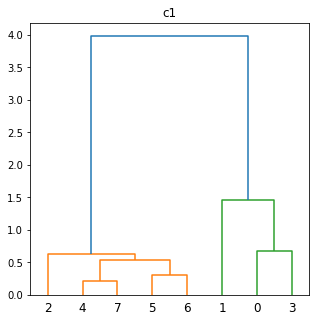

In [70]:
plt.figure(figsize=(5,5))
plt.title('c1')
dend= shc.dendrogram(sch.linkage(c1,method='complete')) #method 설정 가능

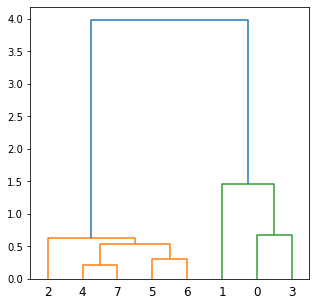

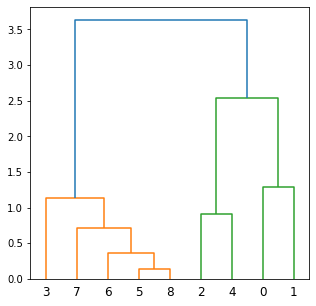

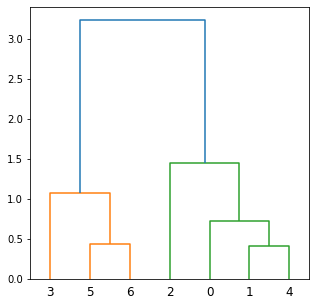

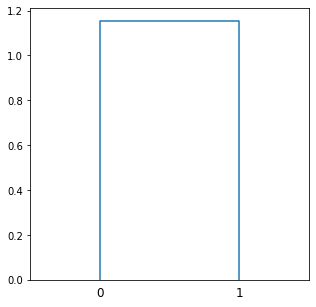

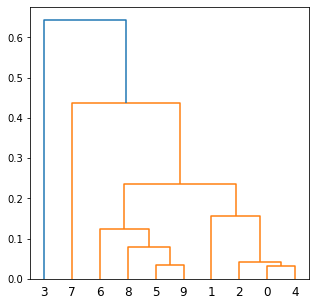

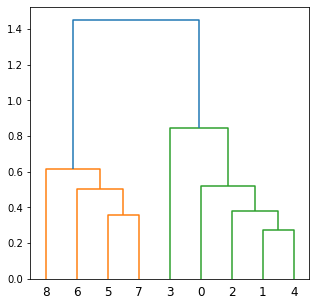

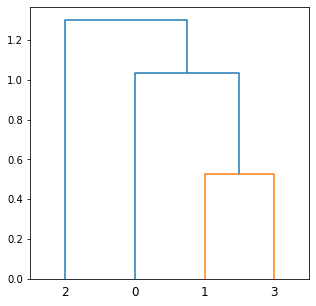

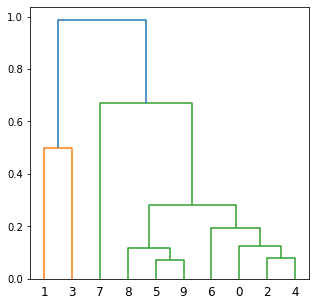

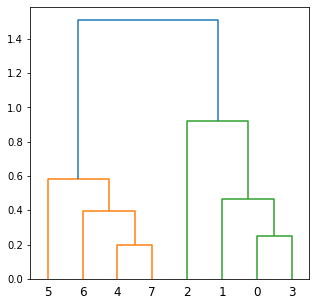

In [655]:
# 이거
for i in range(1,10):
    plt.figure(figsize=(5,5))
    exec("dend=shc.dendrogram(sch.linkage(c" + str(i) + ",method='complete'))" )#method 설정 가능

In [684]:
# 이거
for i in range(1,10):
    exec("corr=c"+str(i)+".values")
    pdist = sch.distance.pdist(corr)
    exec("predict" +str(i) + "=pd.DataFrame(sch.fcluster(shc.linkage(c" + str(i) +",method='complete'),0.6 * pdist.max() ,criterion='distance'))")
    exec("predict"+ str(i)+ ".columns=['mct_cluster']")

In [685]:
# 이거
for i in range(1,10):
    print(i)
    exec("corr=c"+str(i)+".values")
    pdist = sch.distance.pdist(corr)
    exec("predict =pd.DataFrame(sch.fcluster(shc.linkage(c" + str(i) +",method='complete'),0.6 * pdist.max(),criterion='distance'))")
    predict.columns=['mct_cluster']
    print(predict)

1
   mct_cluster
0            2
1            2
2            1
3            2
4            1
5            1
6            1
7            1
2
   mct_cluster
0            3
1            3
2            2
3            1
4            2
5            1
6            1
7            1
8            1
3
   mct_cluster
0            2
1            2
2            2
3            1
4            2
5            1
6            1
4
   mct_cluster
0            1
1            2
5
   mct_cluster
0            1
1            1
2            1
3            3
4            1
5            1
6            1
7            2
8            1
9            1
6
   mct_cluster
0            2
1            2
2            2
3            2
4            2
5            1
6            1
7            1
8            1
7
   mct_cluster
0            2
1            1
2            3
3            1
8
   mct_cluster
0            2
1            1
2            2
3            1
4            2
5            2
6            2
7            3
8        

In [658]:
predict1

,mct_cluster
0,2
1,2
2,1
3,2
4,1
5,1
6,1
7,1


## 클러스터 결과로 배출량 상관관계

In [659]:
predict1

,mct_cluster
0,2
1,2
2,1
3,2
4,1
5,1
6,1
7,1


In [660]:
c1

,농축수산물,배달,부페,식품,아시아음식,양식,패스트푸드,한식
농축수산물,1.000000,0.546578,-0.315803,0.697850,-0.325418,-0.257596,-0.393382,-0.273809
배달,0.546578,1.000000,-0.671792,0.510167,-0.615892,-0.743232,-0.819566,-0.514472
부페,-0.315803,-0.671792,1.000000,-0.343863,0.726763,0.728175,0.686129,0.693445
식품,0.697850,0.510167,-0.343863,1.000000,-0.011452,-0.119825,-0.124848,0.007412
아시아음식,-0.325418,-0.615892,0.726763,-0.011452,1.000000,0.851768,0.833338,0.911662
양식,-0.257596,-0.743232,0.728175,-0.119825,0.851768,1.000000,0.840060,0.848555
패스트푸드,-0.393382,-0.819566,0.686129,-0.124848,0.833338,0.840060,1.000000,0.719888
한식,-0.273809,-0.514472,0.693445,0.007412,0.911662,0.848555,0.719888,1.000000


In [681]:
a= predict1.copy()

In [682]:
a['mct_cat_nm']= c1.columns

In [683]:
a

,mct_cluster,mct_cat_nm
mct_cat_nm,,
농축수산물,2,농축수산물
배달,2,배달
부페,1,부페
식품,2,식품
아시아음식,1,아시아음식
양식,1,양식
패스트푸드,1,패스트푸드
한식,1,한식


In [664]:
df2[df2['cluster']==1]

,year_month,mct_cat_nm,cluster,use_cnt,use_amt,em_cnt,em_g,pay_amt,emd_cd
0,2018-01,간식,1,52496,610608163,209431,516780600,15451299,300663350
9,2018-01,농축수산물,1,20416,1286850315,209431,516780600,15451299,300663350
18,2018-01,마트/슈퍼마켓,1,216880,6941575601,209431,516780600,15451299,300663350
27,2018-01,배달,1,5540,109035309,209431,516780600,15451299,300663350
36,2018-01,부페,1,489,34966074,209431,516780600,15451299,300663350
...,...,...,...,...,...,...,...,...,...
4101,2021-06,아시아음식,1,20074,652042030,250606,442458300,13211344,300663350
4110,2021-06,양식,1,7422,229108605,250606,442458300,13211344,300663350
4119,2021-06,주점및주류판매,1,2815,108391219,250606,442458300,13211344,300663350
4128,2021-06,패스트푸드,1,31610,460075391,250606,442458300,13211344,300663350


In [665]:
df2_1 = pd.merge(df2[df2['cluster']==1], a, on='mct_cat_nm', how='outer')
df2_1

,year_month,mct_cat_nm,cluster,use_cnt,use_amt,em_cnt,em_g,pay_amt,emd_cd,mct_cluster
0,2018-01,간식,1,52496,610608163,209431,516780600,15451299,300663350,NaN
1,2018-02,간식,1,44991,577120430,197905,487022300,14561213,300663350,NaN
2,2018-03,간식,1,51053,597374126,220754,526385950,15727513,300663350,NaN
3,2018-04,간식,1,51169,595634561,217802,480580350,14354392,300663350,NaN
4,2018-05,간식,1,53180,625404743,239574,489215400,14606566,300663350,NaN
...,...,...,...,...,...,...,...,...,...,...
457,2021-02,한식,1,183116,5358316455,166347,341480800,10202844,300663350,1.0
458,2021-03,한식,1,224895,6744070801,200397,406282600,12138507,300663350,1.0
459,2021-04,한식,1,221963,6685837711,211516,407899400,12184553,300663350,1.0
460,2021-05,한식,1,222633,6853638901,244035,451722550,13491046,300663350,1.0


In [666]:
df2_1= df2_1.fillna(9)

In [667]:
df3_1 = df2_1.groupby(['year_month','mct_cluster']).sum().reset_index()
df3_1

,year_month,mct_cluster,cluster,use_cnt,use_amt,em_cnt,em_g,pay_amt,emd_cd
0,2018-01,1.0,5,294457,9101893472,1047155,2583903000,77256495,1503316750
1,2018-01,2.0,3,75859,3653460772,628293,1550341800,46353897,901990050
2,2018-01,9.0,3,273754,7712255769,628293,1550341800,46353897,901990050
3,2018-02,1.0,5,250536,7820280953,989525,2435111500,72806065,1503316750
4,2018-02,2.0,3,72249,4063670679,593715,1461066900,43683639,901990050
...,...,...,...,...,...,...,...,...,...
121,2021-05,2.0,3,188784,6742401415,732105,1355167650,40473138,901990050
122,2021-05,9.0,3,276044,7559217585,732105,1355167650,40473138,901990050
123,2021-06,1.0,5,262103,7261644714,1253030,2212291500,66056720,1503316750
124,2021-06,2.0,3,184189,6593010508,751818,1327374900,39634032,901990050


In [668]:
set(df3_1['mct_cluster'])

{1.0, 2.0, 9.0}

In [669]:
corr_data_log = pd.DataFrame(index= range(0,1), columns = list(set(df3_1['mct_cluster'])))
corr_data_log

,1.0,2.0,9.0
0,NaN,NaN,NaN


In [670]:
#행정동 1클러스터에 대한 
## 오류
corr_data_log = pd.DataFrame(columns = list(set(df3_1['mct_cluster'])))
for i in tqdm(range(1,10)):
    print(i)
    temp_list = [np.nan]
    temp1 = df3_1[df3_1['cluster']==i]
    for j in set(temp1['mct_cluster']):
        temp2 = temp1[temp1['mct_cluster']==j]
        temp2['use_amt']= temp2['use_amt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = np.log(temp2[['em_g', 'use_amt']]).corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))

  0%|          | 0/9 [00:00<?, ?it/s]/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
100%|██████████| 9/9 [00:00<00:00, 327.39it/s]

1
2
3
-0.0
-0.63
4
5
0.59
6
7
8
9


In [460]:
corr_1

-0.37

In [680]:
predict1

,mct_cluster
mct_cat_nm,
농축수산물,2
배달,2
부페,1
식품,2
아시아음식,1
양식,1
패스트푸드,1
한식,1


In [687]:
## 이거
for i in range(1,10): #여기서 i는 행정동별 클러스터
    exec("predict"+ str(i)+ "['mct_cat_nm']= c" + str(i)+ ".columns") #행정동별, 카데고리별 클러스터링 결과 병합
    exec("predict"+str(i)+"['mct_cat_nm']= c"+ str(i)+ ".columns")
    # 배출량, 카드데이터 합친 df2에서 행정동별 클러스터링 같은 것 추출해서, 위의 데이터와 합침
    exec("df2_"+str(i)+ "=pd.merge(df2[df2['cluster']==" + str(i)+ "], predict" + str(i) + ", on='mct_cat_nm', how='outer')")
    exec("df2_"+str(i)+ "=df2_"+str(i)+ ".fillna(9)") #카테고리 클러스터링 안된것은 9로 
    exec("df3_"+ str(i)+ "= df2_"+ str(i)+".groupby(['year_month','mct_cluster']).sum().reset_index()") # 최종적으로 카테고리별 클러스터링 된 것끼리 합

In [699]:
df3_1

,year_month,mct_cluster,cluster,use_cnt,use_amt,em_cnt,em_g,pay_amt,emd_cd
0,2018-01,1.0,5,294457,9101893472,1047155,2583903000,77256495,1503316750
1,2018-01,2.0,3,75859,3653460772,628293,1550341800,46353897,901990050
2,2018-01,9.0,3,273754,7712255769,628293,1550341800,46353897,901990050
3,2018-02,1.0,5,250536,7820280953,989525,2435111500,72806065,1503316750
4,2018-02,2.0,3,72249,4063670679,593715,1461066900,43683639,901990050
...,...,...,...,...,...,...,...,...,...
121,2021-05,2.0,3,188784,6742401415,732105,1355167650,40473138,901990050
122,2021-05,9.0,3,276044,7559217585,732105,1355167650,40473138,901990050
123,2021-06,1.0,5,262103,7261644714,1253030,2212291500,66056720,1503316750
124,2021-06,2.0,3,184189,6593010508,751818,1327374900,39634032,901990050


In [688]:
# 이거
mct_cluster = pd.DataFrame(columns= list(set(df2['mct_cat_nm'])))

for i in range(1,10):
    exec("predict"+str(i)+".set_index('mct_cat_nm',inplace = True)")
    exec("mct_cl"+ str(i)+"=pd.concat([mct_cluster, predict" + str(i)+ ".T], join='outer')")

/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [689]:
aa= pd.concat([mct_cl1, mct_cl2, mct_cl3, mct_cl4, mct_cl5, mct_cl6, mct_cl7, mct_cl8, mct_cl9], axis=0)
aa

,간식,농축수산물,마트/슈퍼마켓,배달,부페,식품,아시아음식,양식,주점및주류판매,패스트푸드,한식
mct_cluster,NaN,2,NaN,2,1,2,1,1,NaN,1,1
mct_cluster,3,3,NaN,2,1,2,1,1,NaN,1,1
mct_cluster,2,2,NaN,2,1,2,NaN,1,NaN,1,NaN
mct_cluster,NaN,NaN,NaN,NaN,1,NaN,2,NaN,NaN,NaN,NaN
mct_cluster,1,1,1,3,NaN,1,1,1,2,1,1
mct_cluster,2,2,2,2,NaN,2,1,NaN,1,1,1
mct_cluster,NaN,NaN,NaN,NaN,2,NaN,NaN,1,3,1,NaN
mct_cluster,2,1,2,1,NaN,2,2,2,3,2,2
mct_cluster,2,NaN,2,3,NaN,2,1,NaN,1,1,1


In [690]:
aa= aa.fillna(9)

In [691]:
aa= aa.reset_index(drop=True)

In [692]:
aa.loc[:,'emd_cluster'] = pd.Series([1,2,3,4,5,6,7,8,9] , index= aa.index)
aa

,간식,농축수산물,마트/슈퍼마켓,배달,부페,식품,아시아음식,양식,주점및주류판매,패스트푸드,한식,emd_cluster
0,9,2,9,2,1,2,1,1,9,1,1,1
1,3,3,9,2,1,2,1,1,9,1,1,2
2,2,2,9,2,1,2,9,1,9,1,9,3
3,9,9,9,9,1,9,2,9,9,9,9,4
4,1,1,1,3,9,1,1,1,2,1,1,5
5,2,2,2,2,9,2,1,9,1,1,1,6
6,9,9,9,9,2,9,9,1,3,1,9,7
7,2,1,2,1,9,2,2,2,3,2,2,8
8,2,9,2,3,9,2,1,9,1,1,1,9


In [464]:
## 이거 안된다ㅠㅠ
for i in range(1,10):
    n=0
    temp_list= [np.nan]
    mct_cluster = pd.DataFrame(index=range(1,10), list(set(df2['mct_cat_nm'])))
    exec("temp_list.append(list(predict"+ str(i)+"['mct_cluster']))")
mct_cluster.iloc[n,:] = temp_list
n += 1

ValueError: cannot copy sequence with size 2 to array axis with dimension 1

In [698]:
## 이거 차분&지연
for i in range(1,10):
    # n=0
    # exec("corr_data_" +str(i) + "= pd.DataFrame(index= range(0,1),columns =list(set(df3_"+str(i)+"['mct_cluster'])))")      
    print(i)
    exec("temp_list_"+str(i)+" = [np.nan]")
    exec("temp1= df3_"+ str(i))
    
    for j in set(temp1['mct_cluster']):
        temp2 = temp1[temp1['mct_cluster']==j]
        temp2['em_g']= temp2['em_g'].diff()
        temp2['use_amt']= temp2['use_amt'].diff()
        temp2['use_amt']= temp2['use_amt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = temp2[['em_g', 'use_amt']].corr()
        print(round(temp_corr.iloc[0,1],2))
    # exec("temp_list_"+str(i)+ "= round(temp_corr.iloc[0,1],2)")
    # n=+1

1
-0.12
-0.27
-0.37
2
-0.11
-0.31
-0.27
-0.41
3
-0.36
-0.37
-0.37
4
-0.07
-0.04
-0.17
5
0.19
0.41
0.17
0.06
6
-0.27
-0.5
-0.28
7
-0.11
0.36
0.03
-0.21
8
-0.04
0.1
0.2
0.07
9
-0.11
-0.31
-0.25
0.14


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [694]:
## 이거 지연&로그
for i in range(1,10):
    # n=0
    exec("corr_data_" +str(i) + "= pd.DataFrame(index= range(0,1),columns =list(set(df3_"+str(i)+"['mct_cluster'])))")      
    print(i)
    exec("temp_list_"+str(i)+" = [np.nan]")
    exec("temp1= df3_"+ str(i))
    
    for j in set(temp1['mct_cluster']):
        temp2 = temp1[temp1['mct_cluster']==j]
        temp2['use_amt']= temp2['use_amt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = np.log(temp2[['em_g', 'use_amt']]).corr()
        print(round(temp_corr.iloc[0,1],2))

1
0.59
-0.63
-0.0
2
0.44
-0.55
-0.34
0.24
3
0.38
-0.46
0.13
4
0.5
0.33
0.2
5
0.76
0.73
0.7
0.28
6
0.52
0.79
0.11
7
0.41
0.51
0.34
0.07
8
0.85
0.88
0.68
0.04
9
0.39
0.47
0.37
0.18


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [420]:
corr_data_1

,1.0,2.0,9.0
0,NaN,NaN,NaN


In [695]:
#오류
predict1['mct_cat_nm']= c1.columns
df2[df2['cluster']==1]
df3 = pd.merge(df2[df2['cluster']==1], predict1, on='mct_cat_nm', how='outer')
df3= df3.fillna(9)
df4 = df3.groupby(['year_month','mct_cluster']).sum().reset_index()

corr_data = pd.DataFrame(index=range(0,len(set(df3['mct_cluster']))),columns = ['mct_cluster'])
n = 0
for i in tqdm(range(1,10)):
    print(i)
    temp_list = [np.nan]
    temp1 = df2[df2['cluster']==i]
    temp_2 = temp1
    for j in set(temp1['mct_cat_nm']):
        temp2 = temp1[temp1['mct_cat_nm']==j]
        temp2['em_g']= temp2['em_g'].diff()
        temp2['use_amt']= temp2['use_amt'].diff()
        temp2['use_amt']= temp2['use_amt'].shift(1)
        temp2= temp2.dropna(axis=0)
        temp_corr = temp2[['em_g', 'use_amt']].corr()
        print(round(temp_corr.iloc[0,1],2))
        temp_list.append(round(temp_corr.iloc[0,1],2))
    corr_data.iloc[n,:] = temp_list
    n += 1
corr_data['cluster'] = set(df['cluster'])


corr_data = pd.DataFrame(index=range(0,len(set(df3['mct_cluster']))),columns = ['mct_cluster'])
n=0
temp_list = [np.nan]

temp1 = df4
temp2 = df4

for j in set(df3['mct_cluster']):
    temp2 = temp1[temp1['mct_cluster']==j]
    temp2['em_g']= temp2['em_g'].diff()
    temp2['use_amt']= temp2['use_amt'].diff()
    temp2['use_amt']= temp2['use_amt'].shift(1)
    temp2= temp2.dropna(axis=0)
    temp_corr = temp2[['em_g', 'use_amt']].corr()
    print(round(temp_corr.iloc[0,1],2))
    temp_list.append(round(temp_corr.iloc[0,1],2))
corr_data.iloc[n,:] = temp_list 

ValueError: 'mct_cat_nm' is both an index level and a column label, which is ambiguous.